c:\Users\mikae\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


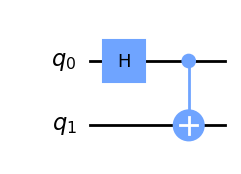

In [2]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")


In [3]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

QiskitRuntimeService.save_account(channel="ibm_quantum", token="<IBM_TOKEN_HERE>", set_as_default=True)
service = QiskitRuntimeService()
 
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
 
options = Options()
options.resilience_level = 1
options.optimization_level = 3
 
# Create an Estimator object
estimator = Estimator(backend, options=options)
 
# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 500)
 
# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([ 0.02069858, -0.02069858,  0.04192872, -0.05450734,  1.02911006,
        1.02467424]), metadata=[{'variance': 1.1226779620738072, 'shots': 512, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.1226779620738072, 'shots': 512, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.1503764355312949, 'shots': 512, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.1491634033463867, 'shots': 512, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.23045107820644775, 'shots': 512, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.23956129415671973, 'shots': 512, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])

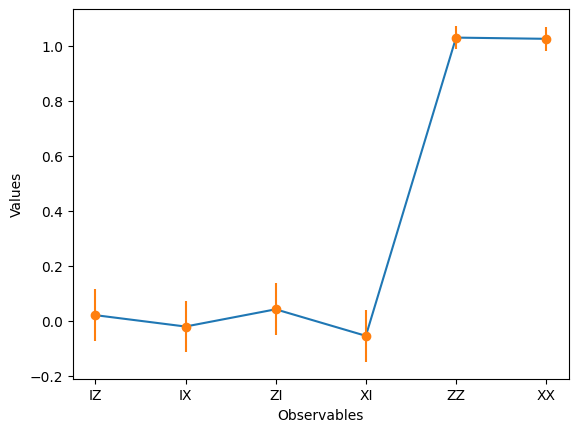

In [8]:
import matplotlib.pyplot as plt
import numpy as np
 
# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values
 
# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()